In [3]:
import numpy as np
import matplotlib.pyplot as plt


class HardDisks:
    '''
    General class to solve exercises concerning the hard disks problem in 2D.
    
    Contains functionality to sample configurations using the Metropolis algorithm 
    and to visualize the particle configurations.
    '''

    def __init__(self, N, q, L, sigma, algorithm='metropolis', initial_conf='rectangular'):
        '''
        Initialize the grid with the hard spheres.

        input:
        - N (int): number of particles in the system
        - q (float): characteristic length for random step
        - L (float): size of the square box
        - sigma (float): disk radius
        - algorithm (str): algorithm used to update the configuration (default: 'metropolis')
        - initial_conf (str): how to initialize the configuration ('rectangular' or 'random')
        '''
        self.N = N
        self.q = q
        self.L = L
        self.sigma = sigma
        self.algorithm = algorithm
        self.initial_conf = initial_conf

        # Initialize particle positions
        self.positions = self.initialize()

    def initialize(self):
        '''
        Initialize the positions of particles in the system.
        
        Returns:
        - grid: Array of shape (N, 2) containing initial particle positions.
        '''
        if self.initial_conf == 'rectangular':
            side = int(np.sqrt(self.N))
            if side**2 != self.N:
                raise ValueError("For 'rectangular' configuration, N must be a perfect square.")
            grid = []
            spacing = self.L / (side-1)  # Distance between particles in the grid
            for i in range(side):
                for j in range(side):
                    grid.append([i * spacing, j * spacing])
            return np.array(grid)
        
        elif self.initial_conf == 'random':
            grid = []
            while len(grid) < self.N:
                x = np.random.uniform(0, self.L)
                y = np.random.uniform(0, self.L)
                position = np.array([x, y])
                # Check if position overlaps with existing disks
                if all(self.get_distance(position, p) for p in grid):
                    grid.append(position)
            return np.array(grid)
        
        else:
            raise ValueError("Invalid initial_conf. Choose 'rectangular' or 'random'.")

    def get_distance(self, position_a, position_b):
        '''
        Calculate the distance between two particles considering periodic boundary conditions.

        input: 
        - position_a (array): Position of particle A (shape: (2,))
        - position_b (array): Position of particle B (shape: (2,))

        output:
        - distance (float): Euclidean distance between the particles.
        '''
        delta = np.abs(position_a - position_b)
        delta = np.where(delta > self.L / 2, self.L - delta, delta)  # Apply PBC
        return np.sqrt((delta**2).sum())

    def is_valid_move(self, new_position, particle_index):
        '''
        Check if a proposed move is valid (i.e., does not cause overlap).

        input:
        - new_position (array): Proposed new position of the particle (shape: (2,))
        - particle_index (int): Index of the particle being moved

        output:
        - valid (bool): True if move is valid, False otherwise
        '''
        for i, pos in enumerate(self.positions):
            if i != particle_index:  # Exclude self-check
                if self.get_distance(new_position, pos) < 2 * self.sigma:
                    return False
        return True

    def metropolis_step(self):
        '''
        Perform a single Metropolis step.

        - Randomly selects a particle
        - Proposes a random move
        - Accepts or rejects the move based on overlap constraints
        '''
        # Step 1: Pick a random particle
        particle_index = np.random.randint(self.N)
        old_position = self.positions[particle_index]

        # Step 2: Propose a move
        delta = (np.random.rand(2) - 0.5) * 2 * self.q  # Random shift in [-q, q] range
        new_position = old_position + delta

        # Apply periodic boundary conditions
        new_position = new_position % self.L

        # Step 3: Check validity of the move
        if self.is_valid_move(new_position, particle_index):
            # Accept the move
            self.positions[particle_index] = new_position

    def simulate(self, steps):
        '''
        Run the Metropolis simulation for a given number of steps.

        input:
        - steps (int): Number of Metropolis steps
        '''
        for step in range(steps):
            self.metropolis_step()

    def plot(self, title="Hard Disks Configuration"):
        '''
        Plot the current configuration of particles.

        input:
        - title (str): Title for the plot
        '''
        plt.figure(figsize=(8, 8))
        plt.scatter(self.positions[:, 0], self.positions[:, 1], s=200, edgecolor='black', label='Disks')
        plt.xlim(0, self.L)
        plt.ylim(0, self.L)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()


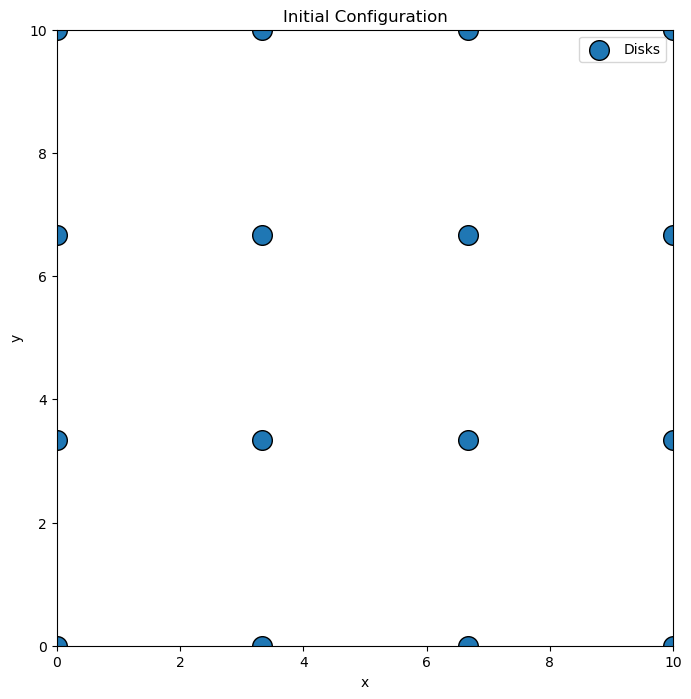

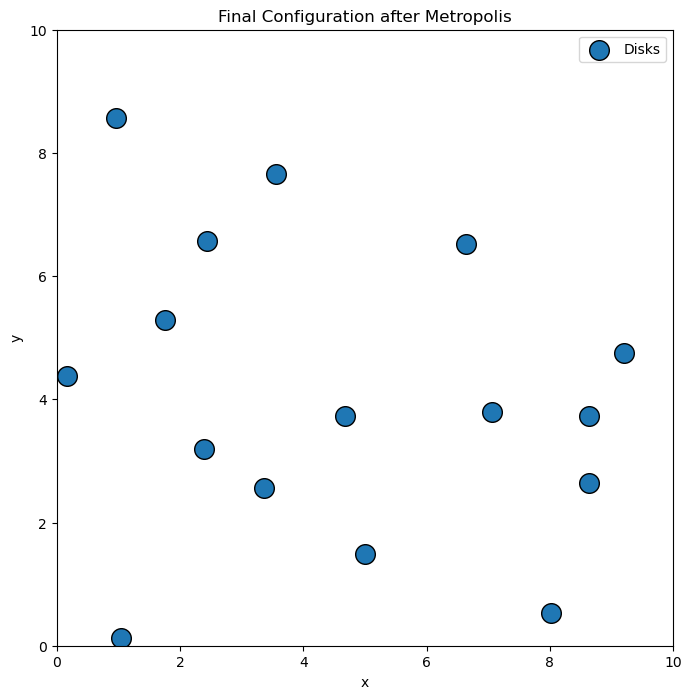

In [4]:
# Parameters
N = 16           # Number of disks
q = 1.0          # Step size
L = 10.0         # Box size
sigma = 0.5      # Disk radius
steps = 1000     # Number of Metropolis steps

# Create the HardDisks system
system = HardDisks(N, q, L, sigma, initial_conf='rectangular')

# Plot initial configuration
system.plot(title="Initial Configuration")

# Simulate the system
system.simulate(steps)

# Plot final configuration
system.plot(title="Final Configuration after Metropolis")
